# Quantifying shakespeare
analyzing the frequences of difference letters in shakespeares work

data from: bit.ly.shakespeare-txt

in this notebook we will:
1. read all of shakespeares works into a list of strings
2. count the frequences of letters used
3. visualize the frequences with a bar graph 

## read the lines of the data

In [53]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """read a .txt file into a list of strings for eahc line"""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        #get rid of leading and ending white space!!" a dog " -> "a dog"
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))



124456


In [54]:
def tally(counts: dict[str, int], keys: str) -> None:
    """mutate counts by increasing the value stored at key by one"""
    if keys in counts:
        counts[keys] += 1
    else:
        counts[keys] = 1


## counting letters

In [55]:
d: dict[str, int] = {}
tally(d, "a")
# d = {"a": 1}
print(d)
tally(d, "a")
# d = {"a", 2}
print(d)
tally(d, "b")
 # d = {"a": 2, "b": 1}
print(d)

{'a': 1}
{'a': 2}
{'a': 2, 'b': 1}


In [56]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """count the frequency of each letter"""
    counts: dict[str, int] = {}
    for line in lines: #line is a string
        for char in line:
            tally(counts, char)
    return counts

shakes_letters: dict[str, int] = count_letters(shakes_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, ' ': 823058, 'e': 447204, '1': 928, '0': 299, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, ',': 83174, 'a': 289150, 'w': 89390, '.': 78025, 'm': 111452, 'k': 35408, '!': 8844, '*': 63, '<': 468, 'v': 37569, '9': 948, '-': 8074, '3': 330, '(': 628, ')': 629, '2': 366, '>': 441, '7': 41, '4': 93, '[': 2085, '#': 1, ']': 2077, 'z': 1631, '8': 40, '@': 8, ':': 1827, '=': 1, '%': 1, '"': 470, '/': 5, '6': 63, '5': 82, "'": 31069, ';': 17199, '~': 1, '_': 71, 'q': 3582, '?': 10476, '|': 33, '&': 21, '`': 1, '}': 2}


## sorting in lsits and dicts

In [57]:
# get list of items of a dictionary
shakes_letters_list = list(shakes_letters.items())
# print(shakes_letters)
#print(shakes_letters_list)
shakes_letters_list = sorted(shakes_letters_list)
# print(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
# shakes_letters_sorted

# mine is weird!!!

## visualize data in a bar graph

<BarContainer object of 64 artists>

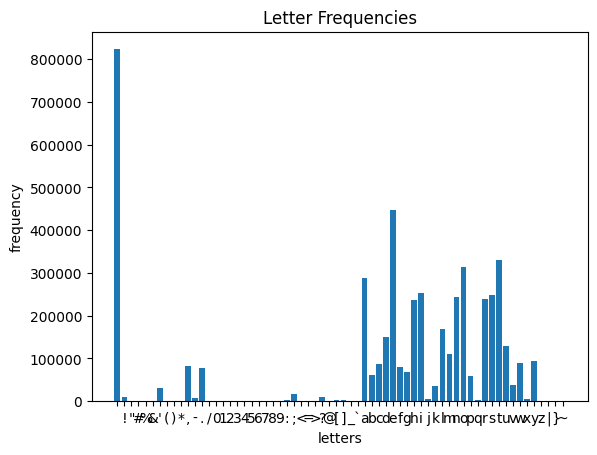

In [58]:
from matplotlib import pyplot

pyplot.title("Letter Frequencies")
pyplot.xlabel("letters")
pyplot.ylabel("frequency")
x_val: list[str] = shakes_letters_sorted.keys()
y_val: list[int] = shakes_letters_sorted.values()
pyplot.bar(x_val, y_val)